# Signals and Systems Project - winter 2021 CE & IT Dept

## Amirhosein Gharaati - 9832064

# Q1

x[n] = 0.75 ** n for 0 <= n <= 21

Plot fourier signal in two figures. One for real part and one for imaginary part.

## Solution

We should calculate a_k. Then we plot the function in a range of numbers.

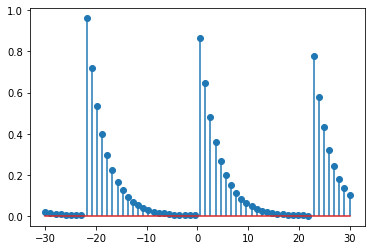

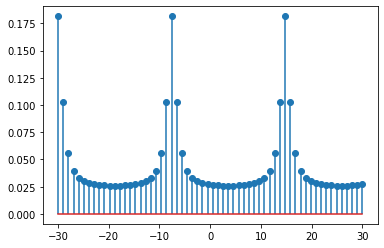

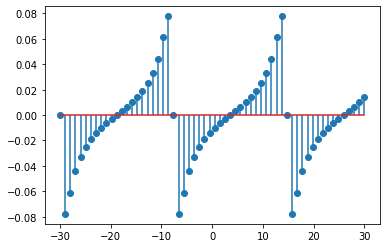

In [5]:
import math
import numpy as np
import pylab as p

x_n = lambda n : 0.75 ** n

N = 22

a_k = lambda k : 1 / N * sum([x_n(n) * math.e ** (-1j*k*(2*math.pi / N) * n) for n in range(N)])

NO_points = 60
x = np.linspace(-NO_points/2, NO_points/2, NO_points)
y = np.exp(np.sin(x))

p.stem(x, [x_n(n%N) for n in x])
p.show()
points = [a_k(k) for k in range(NO_points)]

# real part
p.stem(x, [f.real for f in points])
p.show()

# imag part
p.stem(x, [f.imag for f in points])
p.show()

# Question 2

Given the function: x(t) = sin(pi*t)/ pi *t

We want to plot x(a*t+b) such that a=6, b=4(student number is 9832064)


## Solution

First we plot the base function. Then we give the base function the output we want. Then we plot the result function.

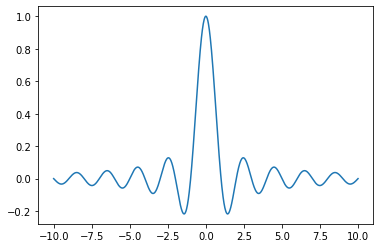

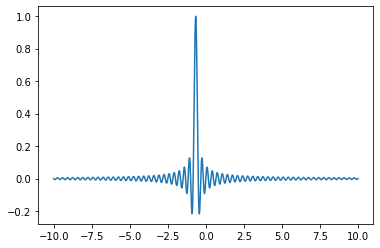

In [30]:
from math import sin, pi
import numpy as np
import pylab as p


a,b= 6,4

x = lambda t : sin(pi*t) / (pi*t) if t != 0 else 1

X_axis = np.linspace(-10, 10, 1000)
y = [x(t) for t in X_axis]


# Base function
p.plot(X_axis, y)
p.show()

# Wanted function
y_wanted = [x(a*t+b) for t in X_axis]

p.plot(X_axis, y_wanted)
p.show()


# Question 3

We have a LTI system which is : h(t) = e^(-t) u(t)

We must calculate the convolution output refer to the impulse figure given in the project. 

## Solution

First we define the figure function. Then we can use integral simple fomula which we learned from Mathematics-1 course with low approximation.

We apply the convolution formula to the functions and plot the output.

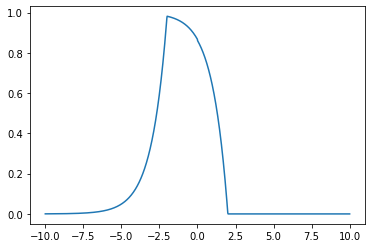

In [7]:
import math
import numpy as np
import pylab as p


u = lambda t : 1 if t >= 0 else 0
x = lambda t : u(t+2) - u(t-2)
h = lambda t : math.exp(-t) * u(t)

def convolve(x, h, t: float) -> float:
    result = 0
    
    step = 0.005
    start, end = -10, 10

    while start <= end:
        result += x(start) * h(start - t) * step
        start += step
    return result

X_axis = np.linspace(-10, 10, 1000)
y = [convolve(x, h, t) for t in X_axis]

p.plot(X_axis, y)
p.show()

# Question 4

### Part a

## Solution

We just calculate fourier transform of the function.

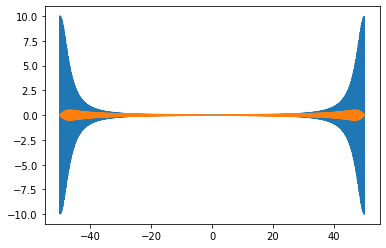

In [21]:
import math
import numpy as np
import pylab as p

h = lambda t : math.exp(-2 * abs(t))

X_axis = np.linspace(-50, 50, 1000)
H_jw = np.fft.fft([h(t) for t in  X_axis])


p.plot(X_axis, np.real(H_jw))
p.plot(X_axis, np.imag(H_jw))
p.show()

### Part b

## Solution

We simply calculate the x_t function.

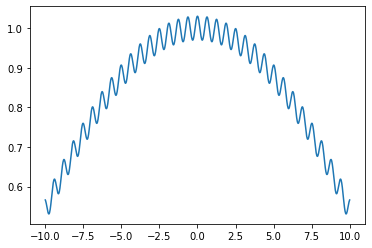

In [9]:
x_s = lambda t : math.cos(0.1 * t)
x_n = lambda t : 0.03 * math.cos(10*t)

x_t = lambda t :  x_s(t) + x_n(t)

X_axis = np.linspace(-10, 10, 1000)
y_t = [x_t(t) for t in X_axis]
p.plot(X_axis, y_t)
p.show()

### Part C

## Solution

We simply define and calculate the wanted function.

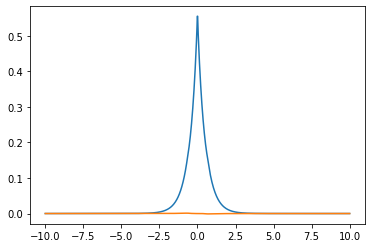

In [22]:
x_s = lambda t : math.cos(0.1 * t)
x_n = lambda t : 0.03 * math.cos(10*t)
x_t = lambda t : x_s(t) + x_n(t)

X_axis = np.linspace(-10, 10, 1000)

X_jw = [x_t(t) for t in X_axis]

h = lambda t : math.exp(-2 * abs(t))
H_jw = np.fft.fft([h(t) for t in  X_axis])

y_t = np.fft.ifft(X_jw * H_jw)

p.plot(X_axis, np.real(y_t))
p.plot(X_axis, np.imag(y_t))
p.show()

### Part D

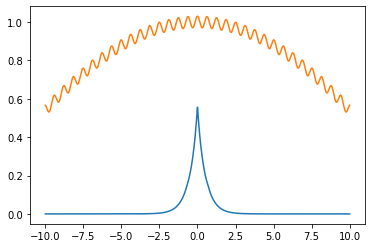

In [11]:
y_t
x_yTotal = [x_t(t) for t in X_axis]

p.plot(X_axis, np.real(y_t))
p.plot(X_axis, x_yTotal)
p.show()

# Q5

## Solution

We consider some variables for the figure like: T, L, n.

We must define a_k expression and then calculate all the fourier terms.

The output can be shown in multiple figures or we can plot them all together.

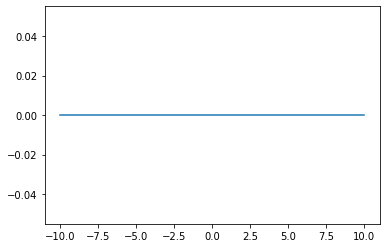

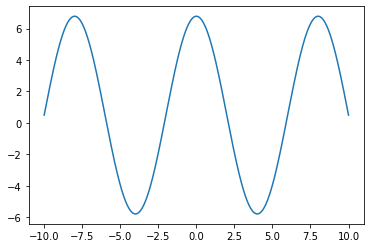

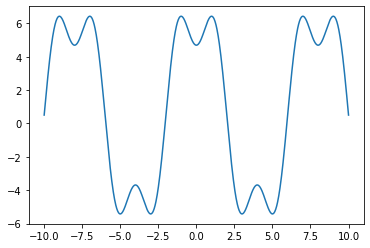

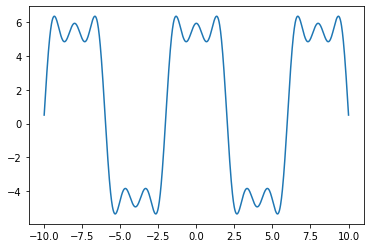

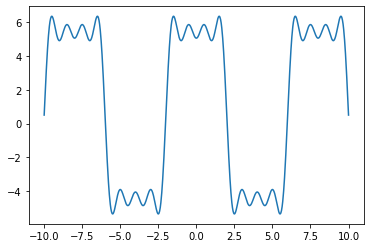

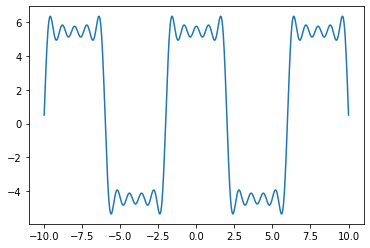

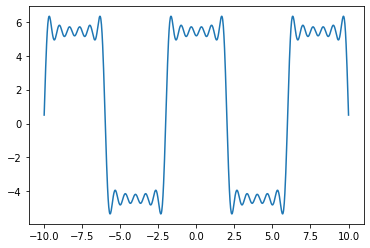

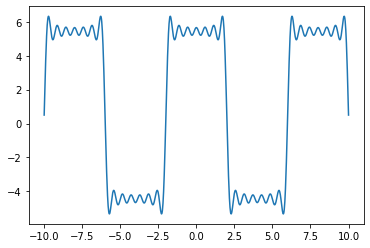

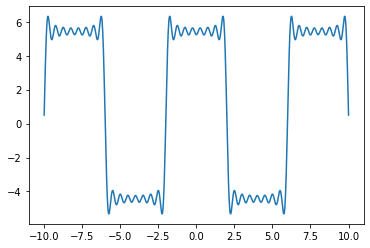

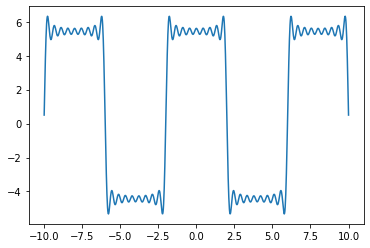

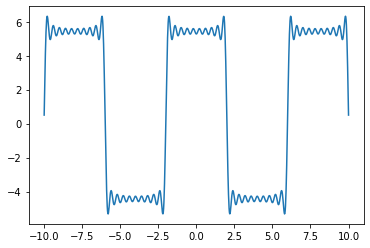

In [28]:
import math
import numpy as np
import pylab as p

n = 10
T = 8
L = T / 2

X_axis = np.linspace(-10, 10, 1000)

def a(k):
    if k == 0:
        return 0.5
    return (2 / k * math.pi) * math.sin(k * math.pi / 2)

def fourier_terms(n ,x):
    global L

    result = 0
    for k in range(2*n):
        result += a(k) * math.cos(k * math.pi * x / L)
    return result

# p.figure(figsize=(20, 10))
for n in range(11):
    y = [fourier_terms(n, x) for x in X_axis]
    p.plot(X_axis, y)
    p.show()
# p.show()